In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import numpy as np
from eplines import ECDFLines

In [3]:
# Read some discharge data from USGS and format data
usgs_url = "https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=12462500&referred_module=sw&period=&begin_date=1963-01-01&end_date=2021-12-31"

q_data = pd.read_csv(usgs_url, comment='#', sep='\t', header=[0, 1])
q_data = q_data.droplevel(1, axis=1)
q_data['DateTime'] = pd.to_datetime(q_data['datetime'])

q_data = q_data.set_index('DateTime')
data = q_data[['149854_00060_00003']]
data = data.rename({'149854_00060_00003':'Q cfs'}, axis=1)

# Create a pivot frame with flow for each day of year
data['DOY'] = data.index.dayofyear
data['YEAR'] = data.index.year

doy_frame = data.pivot(index='DOY', columns='YEAR', values='Q cfs')
doy_frame = doy_frame.dropna()

ecdf_q = ECDFLines(mode='exceedance', y_res=1000)
ecdf_q.ecdf(y_lines=doy_frame)

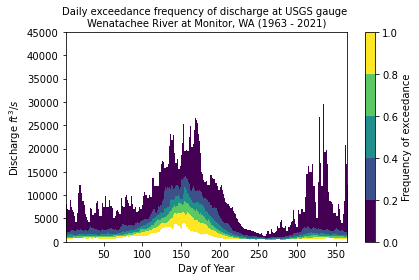

In [4]:
# Set custom  discrete bounds for contour-effect with color map
bounds = np.linspace(0, 1, 6)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

# %% Plotting
fig, ax = plt.subplots()
_, ecdf_im = ecdf_q.plot(ax=ax, mask_to_data=True, norm=norm)

ax.set_ylabel('Discharge $ft^{3}/s$')
ax.set_xlabel('Day of Year')
ax.set_ylim((0, 45000))

cb = fig.colorbar(ecdf_im, ax=ax)
cb.ax.set_ylabel('Frequency of exceedance')
ax.set_title('Daily exceedance frequency of discharge at USGS gauge \nWenatachee River at Monitor, WA (1963 - 2021)',
             fontsize=10)
fig.tight_layout()